In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools


In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#Normalize pixel value between 0 to 1

train_images, test_images = train_images/255.0, test_images/255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


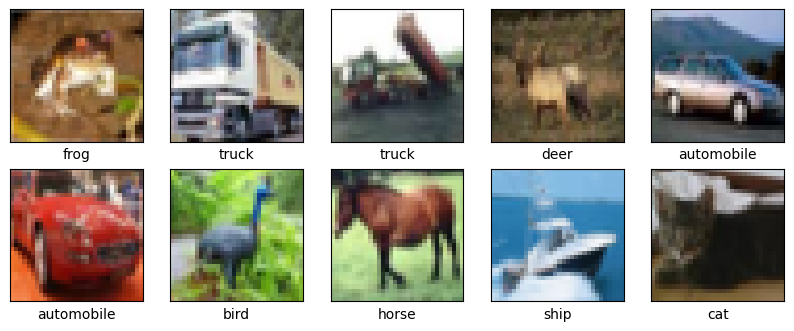

In [14]:
#verify data (try to plot some images)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    #CIFAR is an array so Ineed extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [15]:
'''
In this example, you will configure your CNN to process inputs of shape (32, 32, 3), 
which is the format of CIFAR images. 
You can do this by passing the argument input_shape to your first layer.
'''

model = models.Sequential()

#Convolutional layer with 32 filters, a kernel size of 3x3, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

## MaxPooling layer with pool size of 2x2
model.add(layers.MaxPooling2D((2, 2)))
#second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#second maxpooling layer
model.add(layers.MaxPooling2D((2, 2)))
#third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\loisa\OneDrive\Documents\DIR Program\Week 3 BFN\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d (Conv2D)          │ (None, 30, 30,    │       896 │
│                          │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d            │ (None, 15, 15,    │         0 │
│ (MaxPooling2D)           │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_1 (Conv2D)        │ (None, 13, 13,    │    18,496 │
│                          │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_1          │ (None, 6, 6, 64)  │         0 │
│ (MaxPooling2D)           │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_2 (Conv2D)        │ (None, 4, 4, 64)  │    36,928 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# add densse layers
model.add(layers.Flatten()) #flatten 3D output to 1D
model.add(layers.Dense(64, activation= 'relu')) #fully connected layer with 64 units
model.add(layers.Dense(10)) #output layer with 10 units


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d (Conv2D)          │ (None, 30, 30,    │       896 │
│                          │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d            │ (None, 15, 15,    │         0 │
│ (MaxPooling2D)           │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_1 (Conv2D)        │ (None, 13, 13,    │    18,496 │
│                          │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_1          │ (None, 6, 6, 64)  │         0 │
│ (MaxPooling2D)           │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_2 (Conv2D)        │ (None, 4, 4, 64)  │    36,928 │
├──────────────────────────┼───────────────────┼───────────┤
│ flatten (Flatten)        │ (None, 1024)      │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense (Dense)            │ (None, 64)        │    65,600 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_1 (Dense)          │ (None, 10)        │       650 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#compile and train model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.3572 - loss: 1.7466 - val_accuracy: 0.5486 - val_loss: 1.2782
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.5684 - loss: 1.2088 - val_accuracy: 0.6178 - val_loss: 1.0642
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6396 - loss: 1.0230 - val_accuracy: 0.6448 - val_loss: 1.0158
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6773 - loss: 0.9172 - val_accuracy: 0.6765 - val_loss: 0.9259
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7044 - loss: 0.8439 - val_accuracy: 0.6812 - val_loss: 0.9009
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7272 - loss: 0.7792 - val_accuracy: 0.7011 - val_loss: 0.8626
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7423 - loss: 0.7266 - val_accuracy: 0.7024 - val_loss: 0.8686
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12858s 8s/step - accuracy: 0.7642 

313/313 - 3s - 9ms/step - accuracy: 0.6988 - loss: 0.9017


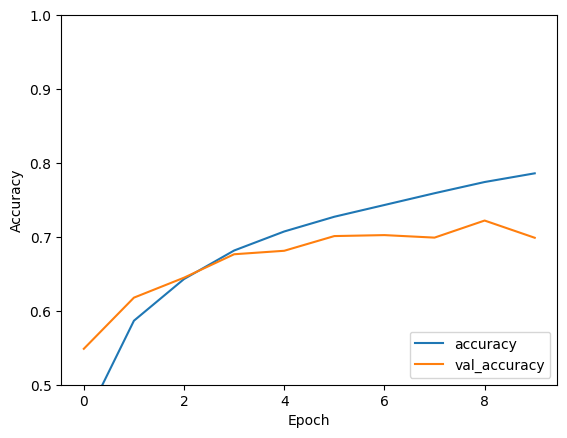

In [23]:
# evaluate model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [24]:
print(test_acc)

0.6988000273704529
